In [4]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/gathering_affinities.ipynb")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
donor_dictionary = {}
for f in os.listdir('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/raw/'):
    donor = f.split('_')[0]
    alleles = [x[:4]+'_'+x[4:] for x in f.split('.')[0].split('_')[1:]]
    donor_dictionary[donor] = alleles

In [3]:
donors = list(sort(donor_dictionary.keys()))

### ROC

Only peptide length 15

In [4]:
# PHBR
r, o = [], []
for donor in donors:
    r.extend(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.random.only_15.csv'.format(donor), index_col=0)['PHBR'].dropna())
    o.extend(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.only_15.csv'.format(donor), index_col=0)['PHBR'])
r = pd.Series(r)
o = pd.Series(o)

TP_PHBR, FP_PHBR, cutoffs = [], [], []
for cutoff in np.arange(0,100, 0.5): 
    TP_PHBR.append((o < cutoff).mean())
    FP_PHBR.append((r < cutoff).mean())
    cutoffs.append(cutoff)

In [5]:
TP, FP = [], []
for donor in donors:
    TP_temp, FP_temp = [], []
    for cutoff in np.arange(0,100, 0.5): 
        TP_temp.append((pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.only_15.csv'.format(donor), index_col=0)['PHBR'] < cutoff).mean())
        FP_temp.append((pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.random.only_15.csv'.format(donor), index_col=0)['PHBR'].dropna() < cutoff).mean())
    TP.append(TP_temp)
    FP.append(FP_temp)

In [6]:
df = pd.DataFrame({'Cutoff': cutoffs,
                  'TP': TP_PHBR,
                  'FP': FP_PHBR})

In [10]:
print df[df.TP > .8][:1].Cutoff
print df[df.FP < .2][-1:].Cutoff

51    25.5
Name: Cutoff, dtype: float64
12    6.0
Name: Cutoff, dtype: float64


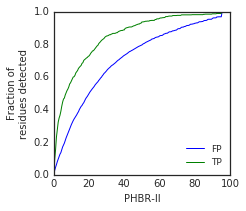

In [12]:
# with 10 cutoff threshold
plt.figure(figsize=(3.5, 3))
plt.plot(np.arange(0,100, 0.5), FP_PHBR, label='FP')
plt.plot(np.arange(0,100, 0.5), TP_PHBR, label='TP')
plt.legend(loc=4, prop={'size': 9})
plt.xlabel('PHBR-II')
plt.ylabel('Fraction of\nresidues detected')
plt.locator_params(axis='y', nbins=6)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/TP_and_FP.pdf')

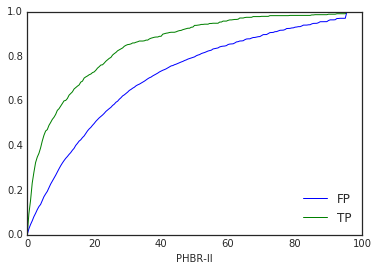

In [26]:
# plotting the PHBR distributions of TP and FP
plt.plot(np.arange(0,100, 0.5), FP_PHBR, label='FP')
plt.plot(np.arange(0,100, 0.5), TP_PHBR, label='TP')
plt.legend(loc=4)
plt.xlabel('PHBR-II')

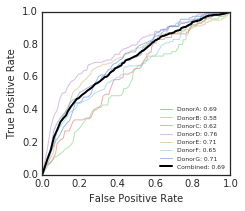

In [25]:
sns.set_style("white")
plt.figure(figsize=(3.5,3))

for i in range(7):
    plt.plot(FP[i], TP[i], c=sns.color_palette("muted", 7)[i], alpha=0.5, 
             label='{0}: {1}'.format(donors[i], str(round(metrics.auc(FP[i], TP[i]), 2))))
plt.plot(FP_PHBR, TP_PHBR, c='k', lw=2, 
         label='{0}: {1}'.format('Combined', str(round(metrics.auc(FP_PHBR, TP_PHBR), 2))))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, prop={'size': 6})

#plt.title('ROC for multi-allelic score: Only length 15')
plt.tight_layout()
#sns.despine()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/validation/ciudad_ROC.15_only.pdf')

All peptide lengths (13-25)

In [26]:
# PHBR
r, o = [], []
for donor in donor_dictionary.keys():
    r.extend(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.random.all_lengths.csv'.format(donor), index_col=0)['PHBR'].dropna())
    o.extend(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.all_lengths.csv'.format(donor), index_col=0)['PHBR'])
r = pd.Series(r)
o = pd.Series(o)

TP_PHBR, FP_PHBR = [], []
for cutoff in np.arange(0,100, 0.5): 
    TP_PHBR.append((o < cutoff).mean())
    FP_PHBR.append((r < cutoff).mean())

In [27]:
TP, FP = [], []
for donor in donor_dictionary.keys():
    TP_temp, FP_temp = [], []
    for cutoff in np.arange(0,100, 0.5): 
        TP_temp.append((pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.all_lengths.csv'.format(donor), index_col=0)['PHBR'] < cutoff).mean())
        FP_temp.append((pd.read_csv('/cellar/users/ramarty/Data/hla_ii/validation/ciudad/parsed/{0}.random.all_lengths.csv'.format(donor), index_col=0)['PHBR'].dropna() < cutoff).mean())
    TP.append(TP_temp)
    FP.append(FP_temp)

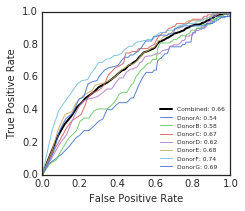

In [28]:
sns.set_style("white")
plt.figure(figsize=(3.5,3))


plt.plot(FP_PHBR, TP_PHBR, c='k', lw=2, 
         label='{0}: {1}'.format('Combined', str(round(metrics.auc(FP_PHBR, TP_PHBR), 2))))
for i in range(7):
    plt.plot(FP[i], TP[i], c=sns.color_palette("muted", 7)[i], alpha=0.9, 
             label='{0}: {1}'.format(donors[i], str(round(metrics.auc(FP[i], TP[i]), 2))))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4,  prop={'size': 6})
#plt.title('ROC for multi-allelic score: Lengths 13-25')
#sns.despine()
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/validation/ciudad_ROC.13_25.pdf')